In [17]:
import math
import warnings
import sys

from numpy.lib.function_base import average
from sklearn.utils import multiclass
from xgboost.sklearn import XGBRFClassifier
warnings.filterwarnings("ignore")
import numpy as np
from statistics import mean, mode
import pandas as pd
import medical_lib as ml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost.core import Booster
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support as score

Einlesen der Daten

In [18]:
medDatamodel4 = pd.read_csv('model4.csv')
medDataCopy_model4 = medDatamodel4.copy()
medDataCopy_model4 = medDataCopy_model4.iloc[:, 3:]
print(medDataCopy_model4.columns)
#################################################################################################
med_class_model4 = medDataCopy_model4.iloc[:, -1]

med_features_model4 = medDataCopy_model4.iloc[:, :-1]

###########################################################################################################################
###########################################################################################################################
# Aufteilen der Daten in 4 Untersets
med_features_train_model4, med_features_test_model4, med_class_train_model4, med_class_test_model4 = train_test_split(med_features_model4, med_class_model4, test_size=0.2, random_state=43, stratify=med_class_model4)
med_class_test_array = np.array(med_class_test_model4)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

Index(['CMV-DNA', 'M-AZ', 'CRP', 'M-BL', 'IL-6', 'PCT', 'BK-PCR', 'M-PR',
       'GGT37', 'EBV-DNA', 'NRBC-REL', 'M-MY', 'LDH37', 'BILI', 'M-MT',
       'GOT37', 'M-NRBC', 'M-ST', 'FERR', 'GPT37', 'AP37', 'IPF', 'HST',
       'THROMB', 'M-EO', 'LEUKO', 'NRBC-ABS', 'IG-ABS', 'IG-REL', 'BA-ABS',
       'CALPH1-N', 'CYSTIFCC', 'LY-ABS', 'CHE37', 'FK-RO', 'HK', 'HB',
       'RETI-ABS', 'status'],
      dtype='object')


KNN

In [19]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model4,med_class_train_model4)
knnYpred = medKNN.predict(med_features_test_model4)
# print('KNN: ', 'Prediction: ', knnYpred)
# print('KNN: ', 'Actual: \n', med_class_test_model3.to_numpy())
accuracyKNN = accuracy_score(knnYpred, med_class_test_array)
precisionKNN = precision_score(knnYpred, med_class_test_array, average='weighted')
recallKNN = recall_score(knnYpred, med_class_test_array, average='weighted')
f1scoreKNN = f1_score(knnYpred, med_class_test_array, average='weighted')
print('K: ', 4, 'KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print(pred_tot_lebendigknn)
print('')
print(actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_4'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungknn)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: K-Nearest Neighbor')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

K:  4 KNN Accuracy:  0.6956521739130435 KNN Precision:  0.7377389203948749 KNN Recall:  0.6956521739130435 KNN F1-Score:  0.7154508573178199
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8043478260869565 0.631578947368421 0.5217391304347826 0.5714285714285715
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.146210984909919


Logistic Regression

In [20]:
lr_model = LogisticRegression(solver='newton-cg' ,multi_class='multinomial')
lr_model.fit(med_features_train_model4, med_class_train_model4)
lr_y_pred = lr_model.predict(med_features_test_model4)
lr_accuracyLogReg = accuracy_score(lr_y_pred, med_class_test_array)
lr_precisionLogReg = precision_score(lr_y_pred, med_class_test_array, average='weighted')
lr_recallLogReg = recall_score(lr_y_pred, med_class_test_array, average='weighted')
lr_f1scoreLogReg = f1_score(lr_y_pred, med_class_test_array, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print(pred_tot_lebendiglr)
print('')
print(actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_4'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')


# pyplot.hist(abweichunglr)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Log-Regression Accuracy:  0.7391304347826086 Log-Regression Precision:  0.8027575239295466 Log-Regression Recall:  0.7391304347826086 Log-Regression F1-Score:  0.7651349246346268
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8260869565217391 0.7333333333333333 0.4782608695652174 0.5789473684210527
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1688194648442787


Decision Tree

In [21]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(med_features_train_model4, med_class_train_model4)
decTree_pred = medical_DecTree.predict(med_features_test_model4)
# print('Decision Tree: ','predicted: \n', decTree_pred)
# print('Decision Tree: ','Actual: \n', med_class_test_model3.to_numpy())
accuracyDecTree = accuracy_score(decTree_pred, med_class_test_array)
precisionDecTree = precision_score(decTree_pred, med_class_test_array, average='weighted')
recallDecTree = recall_score(decTree_pred, med_class_test_array, average='weighted')
f1scoreDecTree = f1_score(decTree_pred, med_class_test_array, average='weighted')
print('Decision Tree: ','medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print(pred_tot_lebendigdc)
print('')
print(actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_4'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungdc)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Decision Tree')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Decision Tree:  medical_DecTree Accuracy:  0.6739130434782609 DecTree Precision:  0.675889669037117 DecTree Recall:  0.6739130434782609 DecTree F1-Score:  0.6726256592767225
[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.75 0.5 0.5217391304347826 0.5106382978723404
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1987607810601495


Random Forest

In [22]:
medical_RF = RandomForestClassifier(n_estimators= 100, random_state=15)
medical_RF.fit(med_features_train_model4, med_class_train_model4)
rfPred = medical_RF.predict(med_features_test_model4)
# print('Random Forest: ','predicted: \n', decTree_pred)
# print('Random Forest: ','Actual: \n', med_class_test_model3.to_numpy())
accuracyRF = accuracy_score(rfPred, med_class_test_array)
precisionRF = precision_score(rfPred, med_class_test_array, average='weighted')
recallRF = recall_score(rfPred, med_class_test_array, average='weighted')
f1scoreRF = f1_score(rfPred, med_class_test_array, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print(pred_tot_lebendigrf)
print('')
print(actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_4'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungrf)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Random Forest')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Anzahl Estimator: 100  RF Accuracy:  0.75 RF Precision:  0.845990113121493 RF Recall:  0.75 RF F1-Score:  0.7925350860133468
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8260869565217391 0.7692307692307693 0.43478260869565216 0.5555555555555555
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0371182992936143


ADABoost

In [23]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model4, med_class_train_model4)
adamodel_prediction = adamodel.predict(med_features_test_model4)
adamodel_accuracy = accuracy_score(med_class_test_model4, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model4, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model4, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model4, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print(pred_tot_lebendigada)
print('')
print(actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_4'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungada)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: ADABoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

ADABOOST:  Accuracy:  0.7065217391304348 Precision:  0.7016304347826087 Recall:  0.7065217391304348 f1-Score:  0.7039282990083906
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8260869565217391 0.6521739130434783 0.6521739130434783 0.6521739130434783
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0535631324709875


XGBoost

XGBOOST:  Accuracy:  0.717391304347826 Precision:  0.6835026019808628 Recall:  0.717391304347826 F1-Score:  0.6989342179559571
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.7934782608695652 0.6111111111111112 0.4782608695652174 0.5365853658536586
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0560832870861845
#################################################################################################


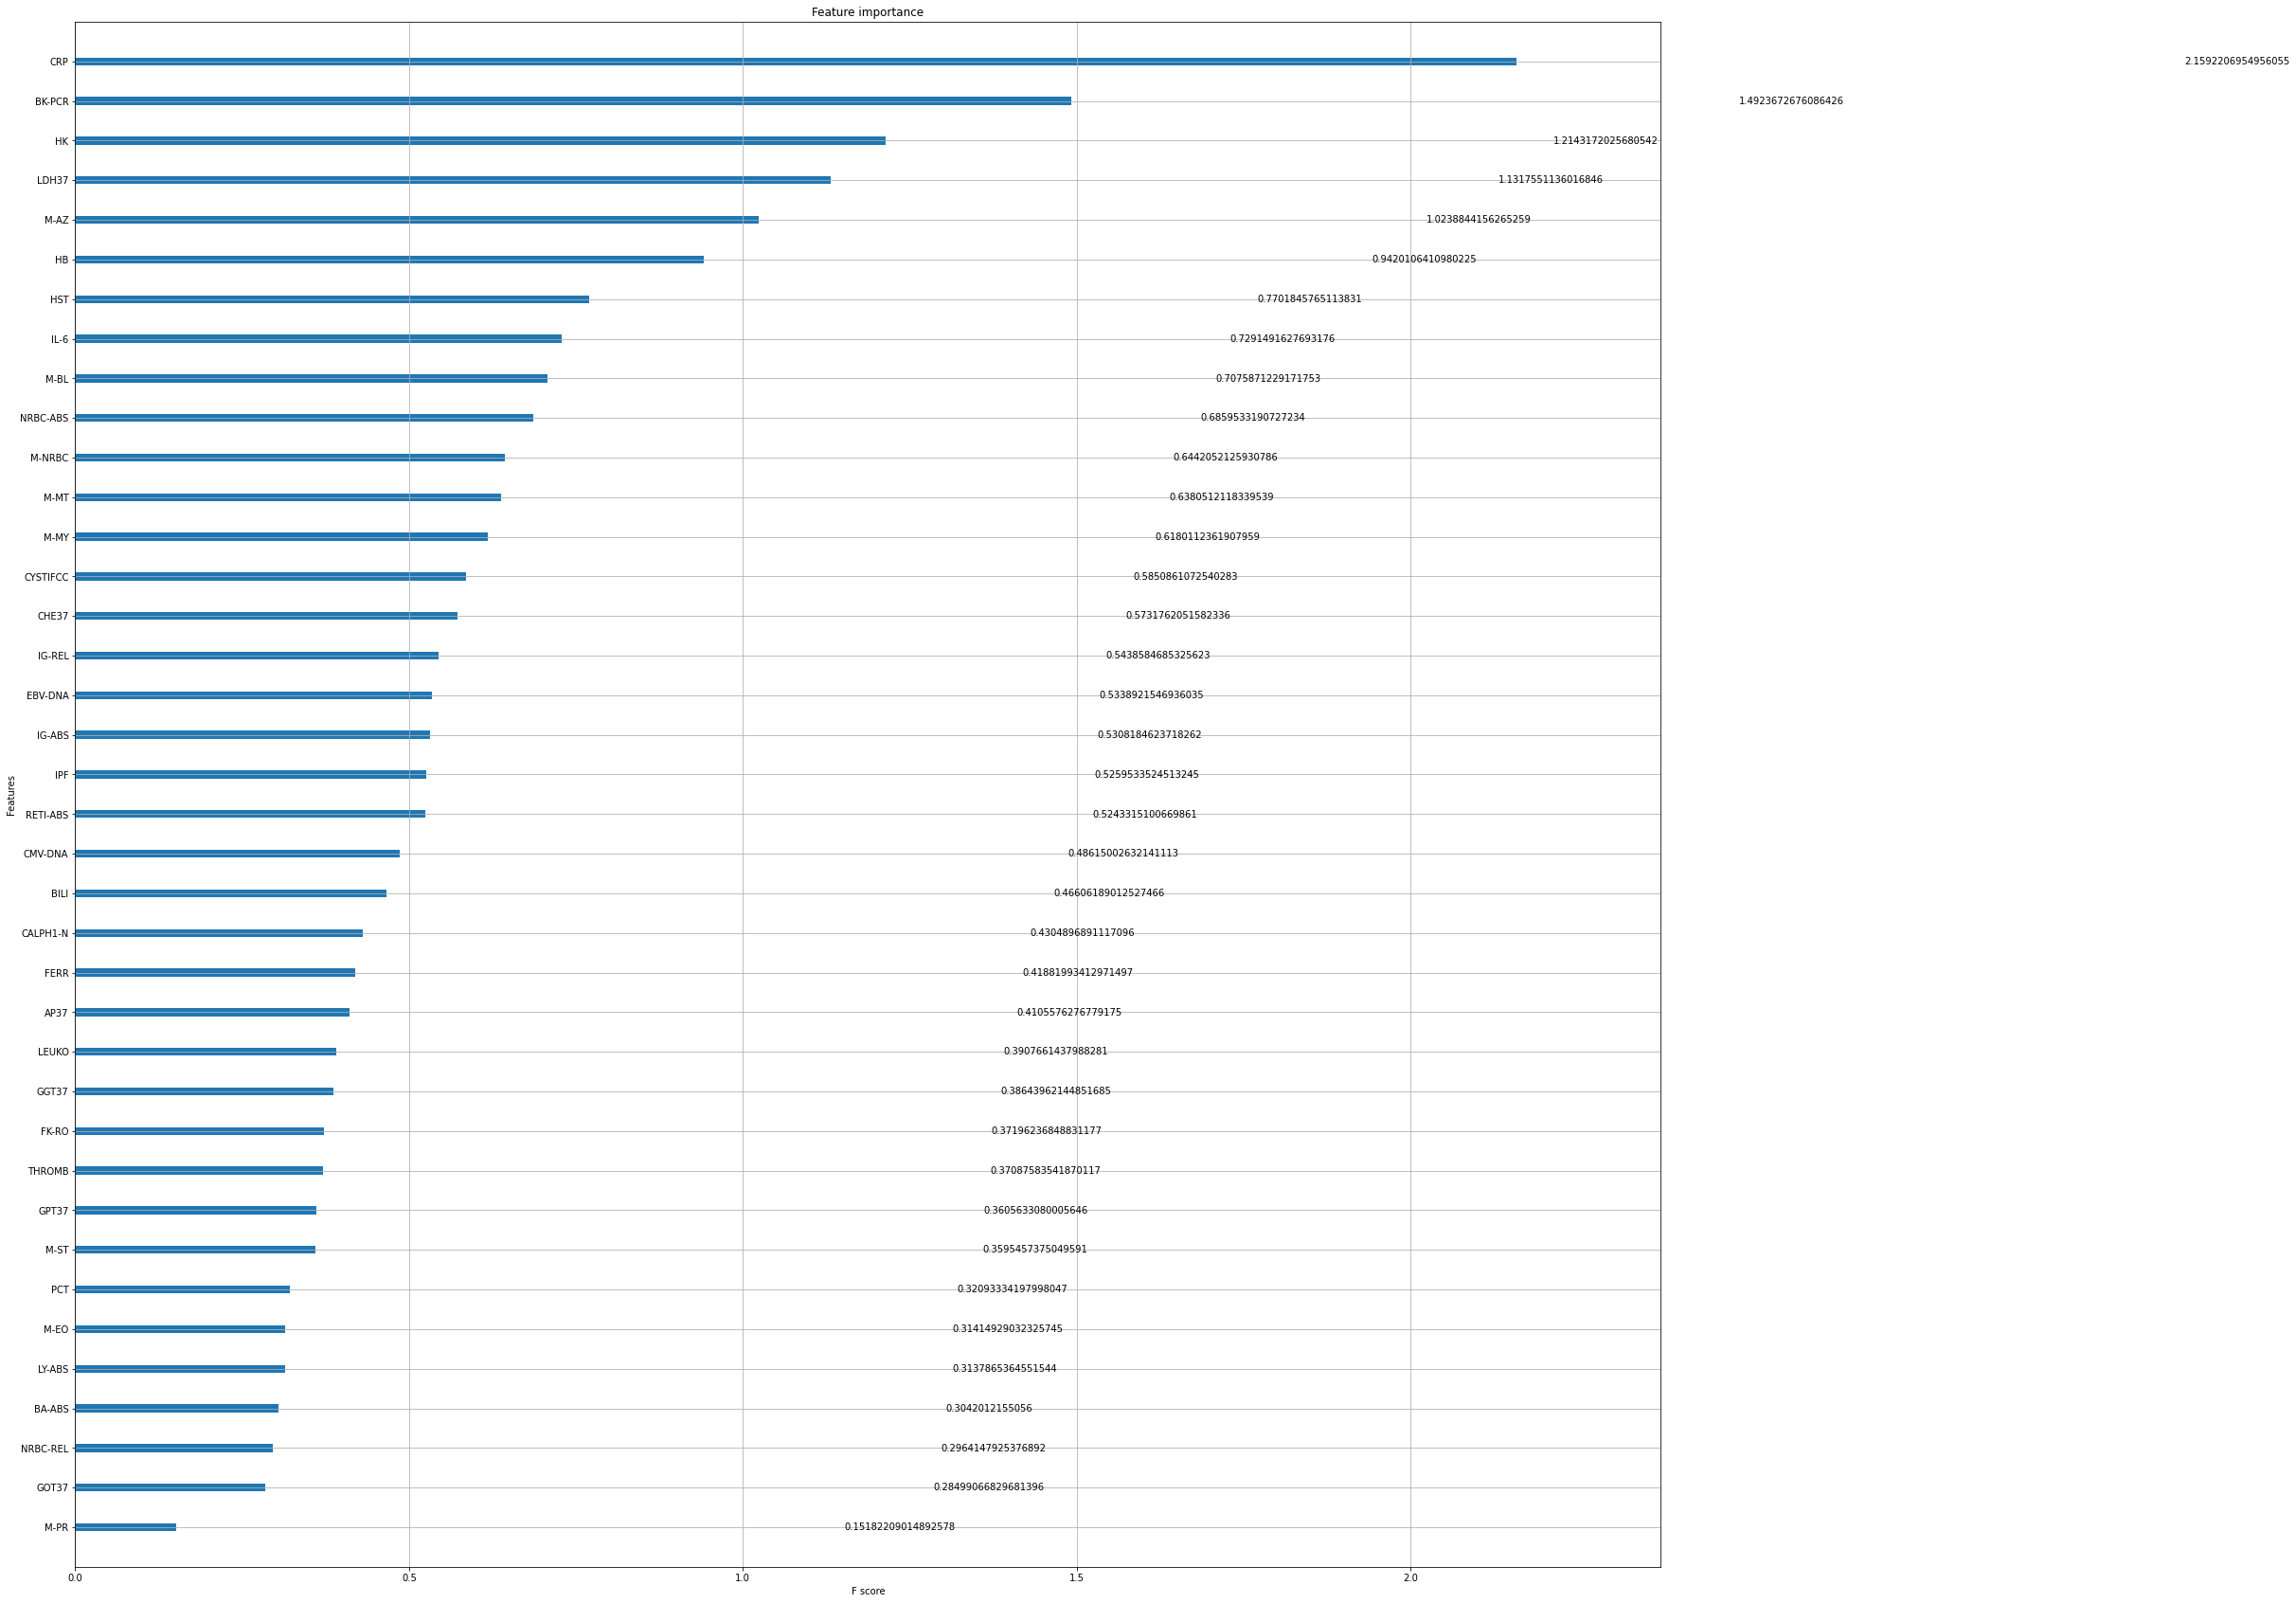

In [24]:
xgmodel = XGBClassifier(n_estimators=75, eval_metric = 'mlogloss')
xgmodel.fit(med_features_train_model4, med_class_train_model4)
xgboosted_prediction = xgmodel.predict(med_features_test_model4)
xgboosted_accuracy = accuracy_score(med_class_test_model4, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model4, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model4, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model4, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print(pred_tot_lebendigxg)
print('')
print(actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
index = result.index[result['Modellierung'] == 'Model_4'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungxg)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: XGBoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type= 'gain').items())
# print(featureranking)
pyplot.rcParams['figure.figsize'] = [30,30]
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()

Feature Selection

In [25]:
newfeatures = []
for i in range(len(featureranking)):
    if featureranking[i][0] < 0.4:
        newfeatures.append(featureranking[i][1])
# print(newfeatures)

for el in newfeatures:
    medDataCopy_model4.drop(el, inplace=True, axis=1)
medDataCopy_model4.to_csv('model4_Selected.csv')

Nach Feature-Selection

In [26]:
medDatamodel4 = pd.read_csv('model4_Selected.csv')
medDataCopy_model4 = medDatamodel4.copy()
medDataCopy_model4 = medDataCopy_model4.iloc[:, 1:]
print(medDataCopy_model4.columns)
#################################################################################################
med_class_model4 = medDataCopy_model4.iloc[:, -1]

med_features_model4 = medDataCopy_model4.iloc[:, :-1]

###########################################################################################################################
###########################################################################################################################
# Aufteilen der Daten in 4 Untersets
med_features_train_model4, med_features_test_model4, med_class_train_model4, med_class_test_model4 = train_test_split(med_features_model4, med_class_model4, test_size=0.2, random_state=43, stratify=med_class_model4)
med_class_test_array = np.array(med_class_test_model4)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

Index(['CMV-DNA', 'M-AZ', 'CRP', 'M-BL', 'IL-6', 'BK-PCR', 'EBV-DNA', 'M-MY',
       'LDH37', 'BILI', 'M-MT', 'M-NRBC', 'FERR', 'AP37', 'IPF', 'HST',
       'NRBC-ABS', 'IG-ABS', 'IG-REL', 'CALPH1-N', 'CYSTIFCC', 'CHE37', 'HK',
       'HB', 'RETI-ABS', 'status'],
      dtype='object')


KNN

In [27]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model4,med_class_train_model4)
knnYpred = medKNN.predict(med_features_test_model4)
# print('KNN: ', 'Prediction: ', knnYpred)
# print('KNN: ', 'Actual: \n', med_class_test_model3.to_numpy())
accuracyKNN = accuracy_score(knnYpred, med_class_test_array)
precisionKNN = precision_score(knnYpred, med_class_test_array, average='weighted')
recallKNN = recall_score(knnYpred, med_class_test_array, average='weighted')
f1scoreKNN = f1_score(knnYpred, med_class_test_array, average='weighted')
print('K: ', 4, 'KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print(pred_tot_lebendigknn)
print('')
print(actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_4_selected'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungknn)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: K-Nearest Neighbor')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

K:  4 KNN Accuracy:  0.7065217391304348 KNN Precision:  0.7549359378281872 KNN Recall:  0.7065217391304348 KNN F1-Score:  0.7298258007976678
[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8152173913043478 0.6666666666666666 0.5217391304347826 0.5853658536585366
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1127377297451937


Logistic Regression

In [28]:
lr_model = LogisticRegression(solver='newton-cg' ,multi_class='multinomial')
lr_model.fit(med_features_train_model4, med_class_train_model4)
lr_y_pred = lr_model.predict(med_features_test_model4)
lr_accuracyLogReg = accuracy_score(lr_y_pred, med_class_test_array)
lr_precisionLogReg = precision_score(lr_y_pred, med_class_test_array, average='weighted')
lr_recallLogReg = recall_score(lr_y_pred, med_class_test_array, average='weighted')
lr_f1scoreLogReg = f1_score(lr_y_pred, med_class_test_array, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print(pred_tot_lebendiglr)
print('')
print(actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_4_selected'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')


# pyplot.hist(abweichunglr)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Log-Regression Accuracy:  0.7282608695652174 Log-Regression Precision:  0.8254568367989918 Log-Regression Recall:  0.7282608695652174 Log-Regression F1-Score:  0.7733462362618373
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.782608695652174 0.6153846153846154 0.34782608695652173 0.4444444444444444
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1029261646926802


Decision Tree

In [29]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(med_features_train_model4, med_class_train_model4)
decTree_pred = medical_DecTree.predict(med_features_test_model4)
# print('Decision Tree: ','predicted: \n', decTree_pred)
# print('Decision Tree: ','Actual: \n', med_class_test_model3.to_numpy())
accuracyDecTree = accuracy_score(decTree_pred, med_class_test_array)
precisionDecTree = precision_score(decTree_pred, med_class_test_array, average='weighted')
recallDecTree = recall_score(decTree_pred, med_class_test_array, average='weighted')
f1scoreDecTree = f1_score(decTree_pred, med_class_test_array, average='weighted')
print('Decision Tree: ','medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print(pred_tot_lebendigdc)
print('')
print(actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_4_selected'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungdc)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Decision Tree')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Decision Tree:  medical_DecTree Accuracy:  0.6956521739130435 DecTree Precision:  0.6951777087646653 DecTree Recall:  0.6956521739130435 DecTree F1-Score:  0.6946588417975886
[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8043478260869565 0.6086956521739131 0.6086956521739131 0.6086956521739131
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1284995977646646


Random Forest

In [30]:
medical_RF = RandomForestClassifier(n_estimators= 100, random_state=15)
medical_RF.fit(med_features_train_model4, med_class_train_model4)
rfPred = medical_RF.predict(med_features_test_model4)
# print('Random Forest: ','predicted: \n', decTree_pred)
# print('Random Forest: ','Actual: \n', med_class_test_model3.to_numpy())
accuracyRF = accuracy_score(rfPred, med_class_test_array)
precisionRF = precision_score(rfPred, med_class_test_array, average='weighted')
recallRF = recall_score(rfPred, med_class_test_array, average='weighted')
f1scoreRF = f1_score(rfPred, med_class_test_array, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print(pred_tot_lebendigrf)
print('')
print(actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_4_selected'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungrf)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Random Forest')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Anzahl Estimator: 100  RF Accuracy:  0.7065217391304348 RF Precision:  0.8293950850661626 RF Recall:  0.7065217391304348 RF F1-Score:  0.7630434782608695
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.782608695652174 0.6363636363636364 0.30434782608695654 0.411764705882353
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0830364093114044


ADABoost

In [31]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model4, med_class_train_model4)
adamodel_prediction = adamodel.predict(med_features_test_model4)
adamodel_accuracy = accuracy_score(med_class_test_model4, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model4, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model4, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model4, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print(pred_tot_lebendigada)
print('')
print(actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_4_selected'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungada)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: ADABoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

ADABOOST:  Accuracy:  0.40217391304347827 Precision:  0.5902173913043478 Recall:  0.40217391304347827 f1-Score:  0.47711670480549195
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.5108695652173914 0.2608695652173913 0.5217391304347826 0.3478260869565218
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0575924973065798


XGBoost

In [32]:
xgmodel = XGBClassifier(n_estimators=75, eval_metric = 'mlogloss')
xgmodel.fit(med_features_train_model4, med_class_train_model4)
xgboosted_prediction = xgmodel.predict(med_features_test_model4)
xgboosted_accuracy = accuracy_score(med_class_test_model4, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model4, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model4, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model4, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print(pred_tot_lebendigxg)
print('')
print(actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
index = result.index[result['Modellierung'] == 'Model_4_selected'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungxg)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: XGBoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()
# featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type= 'gain').items())
# # print(featureranking)
# pyplot.rcParams['figure.figsize'] = [30,30]
# plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
# pyplot.show()

XGBOOST:  Accuracy:  0.6956521739130435 Precision:  0.6493830787309048 Recall:  0.6956521739130433 F1-Score:  0.6717087260565521
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8152173913043478 0.6666666666666666 0.5217391304347826 0.5853658536585366
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0033026747142892
#################################################################################################
